<a href="https://colab.research.google.com/github/aish0606/DeepLearning/blob/main/Applications/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
x, y = sklearn.datasets.make_moons(n_samples=200,noise=0.20)

In [5]:
print(x[:3])
print(y[:3])

[[ 0.03387237  0.46365361]
 [ 0.43839421  0.95734   ]
 [-0.83730412  0.02579992]]
[1 0 0]


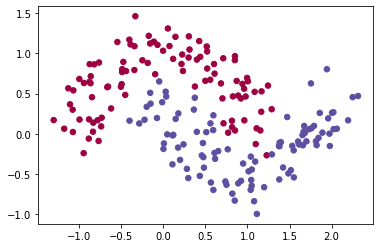

In [7]:
plt.scatter(x[:,0], x[:,1], s=30, c=y, cmap=plt.cm.Spectral)
plt.show()

In [8]:
# Convert the data points to Tensors
x = torch.FloatTensor(x) # COnvert x to Float as x is alrady float
y = torch.LongTensor(y)  # Convert the labels to Long format always

In [9]:
print(x[:3])
print(y[:3])

tensor([[ 0.0339,  0.4637],
        [ 0.4384,  0.9573],
        [-0.8373,  0.0258]])
tensor([1, 0, 0])


In [10]:
# Build the NN
class FeedForward(torch.nn.Module):
  def __init__(self, input_neuron, hidden_neuron, output_neuron):
    super(FeedForward, self).__init__()
    self.hidden = nn.Linear(input_neuron, hidden_neuron)
    self.out = nn.Linear(hidden_neuron, output_neuron)

  def forward(self, x):
    """
    This function is present on nn.Module class.
    Here we are overridding the forward method.
    """
    x = self.hidden(x)
    x = F.relu(x)
    x = self.out(x)
    return x

In [11]:
# keep the hidden neuron more than 20
network = FeedForward(input_neuron=2, hidden_neuron=50, output_neuron=2)
optimizer = torch.optim.SGD(network.parameters(), lr=0.02)
loss_function = nn.CrossEntropyLoss()

200
200


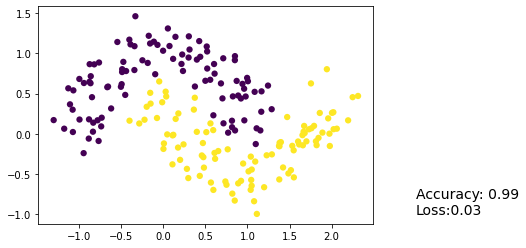

200
200


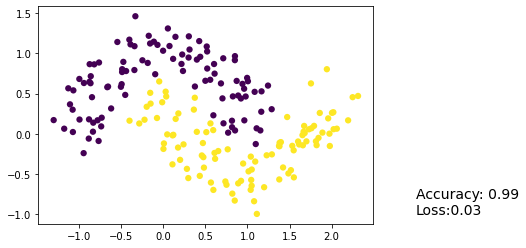

200
200


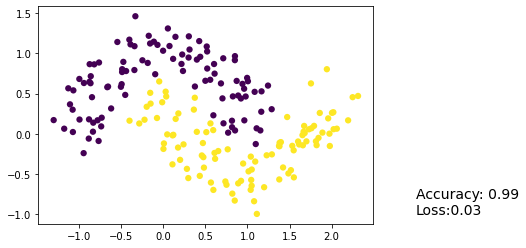

200
200


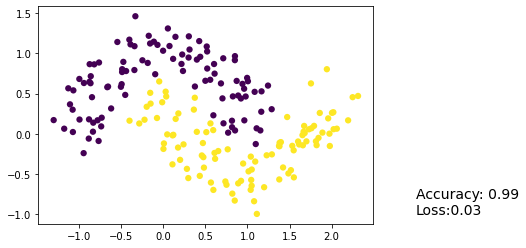

200
200


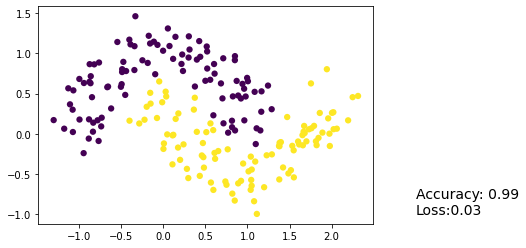

200
200


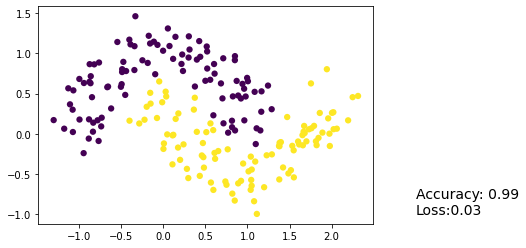

200
200


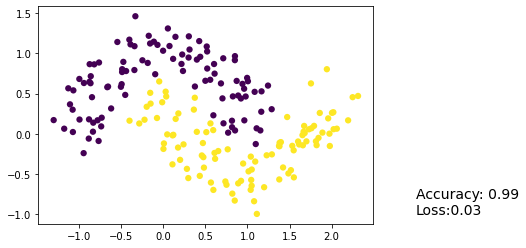

200
200


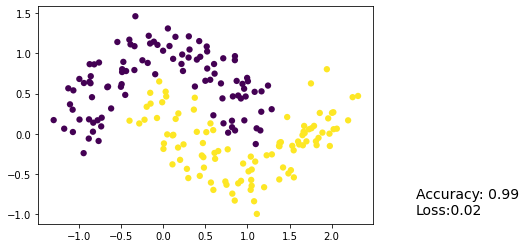

200
200


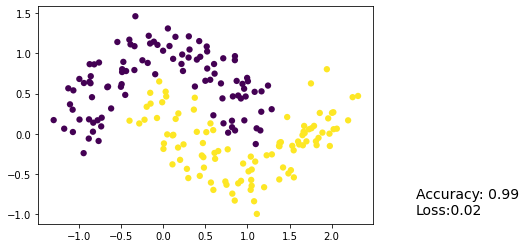

200
200


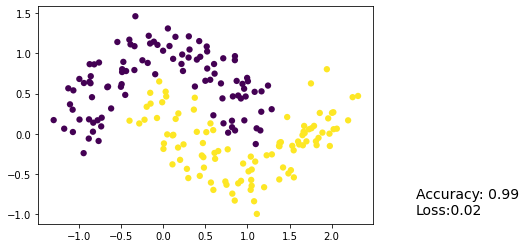

In [18]:
plt.ion()
num_epochs = 10000
for epoch in range(num_epochs):
  out = network(x) # same as network.forward(x)
  loss = loss_function(out, y)
  optimizer.zero_grad()
  # Calc Gradient Descent
  loss.backward()
  # calc Loss val
  optimizer.step()

  # For Visualization, we need to convert the tensor to Numpy Array
  if epoch % 1000 == 0:
    max_value, prediction_index = torch.max(out, 1) # 1 as we need max value along the ROW
    predicted_y = prediction_index.data.numpy()
    print(len(predicted_y))
    print(len(max_value))
    label_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s=40, c=predicted_y, lw=0) #lw-line width
    accuracy = (predicted_y == label_y).sum() / label_y.size
    plt.text(3, -1, 'Accuracy: {:.2f}\nLoss:{:.2f}'.format(accuracy, loss), fontdict={'size': 14})
    plt.pause(0.1)

plt.ioff()
plt.show()